# Wetterbedingungen und weitere Einflüsse auf die Fahrradmobilität in Seattle

## Einleitung

### Verwendete Datenquellen

### Verwendete Programmbibliotheken

In [1]:
# Importieren von Programm-Bibliotheken

# Programm-Bibliothek zur effizienten Bearbeitung von Datentabellen
import pandas as pd

# Programm-Bibliothek zur schnellen Bearbeitung numerischer Tabellendaten
import numpy as np

# Programm-Bibliothek zu grafischen Darstellung von Daten
import altair as alt
alt.renderers.enable('notebook')
alt.data_transformers.disable_max_rows()

# Programm für Lineare Regression
from sklearn.linear_model import LinearRegression

## Laden und erstes Explorieren der Daten *(Gathering, First Exploration)*

### Laden und erstes Explorieren der Verkehrsdaten

In [2]:
Verkehrsdaten = pd.read_csv(
    'Daten/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv'
)

In [3]:
Verkehrsdaten.head()

Date  Fremont Bridge East Sidewalk  \
0  05/31/2019 11:00:00 PM                          22.0   
1  05/31/2019 10:00:00 PM                          29.0   
2  05/31/2019 09:00:00 PM                          46.0   
3  05/31/2019 08:00:00 PM                          48.0   
4  05/31/2019 07:00:00 PM                          97.0   

   Fremont Bridge West Sidewalk  
0                          35.0  
1                          52.0  
2                          57.0  
3                          92.0  
4                         151.0

In [4]:
Verkehrsdaten.tail()

Date  Fremont Bridge East Sidewalk  \
58363  10/03/2012 04:00:00 AM                           6.0   
58364  10/03/2012 03:00:00 AM                           2.0   
58365  10/03/2012 02:00:00 AM                           1.0   
58366  10/03/2012 01:00:00 AM                           4.0   
58367  10/03/2012 12:00:00 AM                           4.0   

       Fremont Bridge West Sidewalk  
58363                           1.0  
58364                           3.0  
58365                           1.0  
58366                           6.0  
58367                           9.0

In [5]:
Verkehrsdaten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58368 entries, 0 to 58367
Data columns (total 3 columns):
Date                            58368 non-null object
Fremont Bridge East Sidewalk    58359 non-null float64
Fremont Bridge West Sidewalk    58359 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.3+ MB


In [6]:
Verkehrsdaten.describe(include='all').T

count unique                     top freq  \
Date                          58368  58368  07/10/2013 06:00:00 AM    1   
Fremont Bridge East Sidewalk  58359    NaN                     NaN  NaN   
Fremont Bridge West Sidewalk  58359    NaN                     NaN  NaN   

                                 mean      std  min  25%  50%  75%  max  
Date                              NaN      NaN  NaN  NaN  NaN  NaN  NaN  
Fremont Bridge East Sidewalk  52.1382  67.5161    0    6   28   70  698  
Fremont Bridge West Sidewalk  58.9453  85.8879    0    7   29   71  745

### *Do-It-Yourself: Laden und erstes Explorieren der Wetterdaten*

In [7]:
Wetterdaten = pd.read_csv('Daten/1786440.csv')

In [8]:
Wetterdaten.head()

STATION                                         NAME        DATE  AWND  \
0  USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US  2012-10-03   7.3   
1  USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US  2012-10-04   6.5   
2  USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US  2012-10-05   5.7   
3  USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US  2012-10-06   5.1   
4  USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US  2012-10-07   1.3   

   PGTM  PRCP  SNOW  SNWD  TAVG  TMAX  ...  WT03  WT04  WT05  WT08  WT09  \
0   NaN   0.0   0.0   0.0   NaN  18.9  ...   NaN   NaN   NaN   NaN   NaN   
1   NaN   0.0   0.0   0.0   NaN  18.9  ...   NaN   NaN   NaN   NaN   NaN   
2   NaN   0.0   0.0   0.0   NaN  21.7  ...   NaN   NaN   NaN   NaN   NaN   
3   NaN   0.0   0.0   0.0   NaN  23.9  ...   NaN   NaN   NaN   NaN   NaN   
4   NaN   0.0   0.0   0.0   NaN  23.9  ...   NaN   NaN   NaN   NaN   NaN   

   WT13  WT14  WT16  WT18  WT22  
0   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN   NaN  

[5 rows x 27 columns]

In [9]:
Wetterdaten.tail()

STATION                                         NAME        DATE  \
2431  USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US  2019-05-31   
2432  USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US  2019-06-01   
2433  USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US  2019-06-02   
2434  USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US  2019-06-03   
2435  USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US  2019-06-04   

      AWND  PGTM  PRCP  SNOW  SNWD  TAVG  TMAX  ...  WT03  WT04  WT05  WT08  \
2431   2.2   NaN   0.0   0.0   0.0  17.1  24.4  ...   NaN   NaN   NaN   1.0   
2432   2.7   NaN   0.0   0.0   0.0  16.4  24.4  ...   NaN   NaN   NaN   1.0   
2433   3.1   NaN   0.0   0.0   0.0  17.5  23.9  ...   NaN   NaN   NaN   NaN   
2434   3.3   NaN   0.0   0.0   0.0  15.6  20.6  ...   NaN   NaN   NaN   NaN   
2435   2.4   NaN   0.0   0.0   0.0  15.8  22.2  ...   NaN   NaN   NaN   NaN   

      WT09  WT13  WT14  WT16  WT18  WT22  
2431   NaN   NaN   NaN   NaN   NaN   NaN  
2432   NaN   NaN   NaN   NaN   NaN   NaN  
2433   NaN   NaN   NaN   NaN   NaN   NaN  
2434   NaN   NaN   NaN   NaN   NaN   NaN  
2435   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 27 columns]

In [10]:
Wetterdaten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 27 columns):
STATION    2436 non-null object
NAME       2436 non-null object
DATE       2436 non-null object
AWND       2435 non-null float64
PGTM       52 non-null float64
PRCP       2435 non-null float64
SNOW       2435 non-null float64
SNWD       2435 non-null float64
TAVG       2256 non-null float64
TMAX       2435 non-null float64
TMIN       2435 non-null float64
WDF2       2435 non-null float64
WDF5       2415 non-null float64
WSF2       2435 non-null float64
WSF5       2415 non-null float64
WT01       1050 non-null float64
WT02       123 non-null float64
WT03       17 non-null float64
WT04       2 non-null float64
WT05       3 non-null float64
WT08       83 non-null float64
WT09       1 non-null float64
WT13       104 non-null float64
WT14       19 non-null float64
WT16       129 non-null float64
WT18       6 non-null float64
WT22       9 non-null float64
dtypes: float64(24), object(3)


In [11]:
Wetterdaten.describe(include='all').T

count unique                                          top  freq  \
STATION  2436      1                                  USW00024233  2436   
NAME     2436      1  SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US  2436   
DATE     2436   2436                                   2014-05-22     1   
AWND     2435    NaN                                          NaN   NaN   
PGTM       52    NaN                                          NaN   NaN   
PRCP     2435    NaN                                          NaN   NaN   
SNOW     2435    NaN                                          NaN   NaN   
SNWD     2435    NaN                                          NaN   NaN   
TAVG     2256    NaN                                          NaN   NaN   
TMAX     2435    NaN                                          NaN   NaN   
TMIN     2435    NaN                                          NaN   NaN   
WDF2     2435    NaN                                          NaN   NaN   
WDF5     2415    NaN                                          NaN   NaN   
WSF2     2435    NaN                                          NaN   NaN   
WSF5     2415    NaN                                          NaN   NaN   
WT01     1050    NaN                                          NaN   NaN   
WT02      123    NaN                                          NaN   NaN   
WT03       17    NaN                                          NaN   NaN   
WT04        2    NaN                                          NaN   NaN   
WT05        3    NaN                                          NaN   NaN   
WT08       83    NaN                                          NaN   NaN   
WT09        1    NaN                                          NaN   NaN   
WT13      104    NaN                                          NaN   NaN   
WT14       19    NaN                                          NaN   NaN   
WT16      129    NaN                                          NaN   NaN   
WT18        6    NaN                                          NaN   NaN   
WT22        9    NaN                                          NaN   NaN   

             mean      std  min      25%     50%      75%   max  
STATION       NaN      NaN  NaN      NaN     NaN      NaN   NaN  
NAME          NaN      NaN  NaN      NaN     NaN      NaN   NaN  
DATE          NaN      NaN  NaN      NaN     NaN      NaN   NaN  
AWND      3.40234  1.38279  0.4      2.4     3.2      4.3   9.5  
PGTM      1413.48  728.946    2  1030.75  1440.5  1996.25  2357  
PRCP      3.03257  6.66503    0        0       0        3  55.9  
SNOW     0.434086  6.34253    0        0       0        0   163  
SNWD     0.708419  8.77461    0        0       0        0   180  
TAVG      12.2891  5.91813 -4.4        8    11.9     16.9  27.6  
TMAX      16.3255  7.40495 -1.6     10.6    15.6     21.7  35.6  
TMIN       8.1037  5.00329 -7.1      4.4     8.3     12.2  20.6  
WDF2      175.793  102.652    2      100     200      220   360  
WDF5      183.957  99.7709    3      120     200      230   360  
WSF2      7.40517  2.49704  2.7      5.8     6.7      8.9  19.7  
WSF5      9.66923  3.43885  2.7      7.2     8.9     11.2  26.8  
WT01            1        0    1        1       1        1     1  
WT02            1        0    1        1       1        1     1  
WT03            1        0    1        1       1        1     1  
WT04            1        0    1        1       1        1     1  
WT05            1        0    1        1       1        1     1  
WT08            1        0    1        1       1        1     1  
WT09            1      NaN    1        1       1        1     1  
WT13            1        0    1        1       1        1     1  
WT14            1        0    1        1       1        1     1  
WT16            1        0    1        1       1        1     1  
WT18            1        0    1        1       1        1     1  
WT22            1        0    1        1       1        1     1

## Strukturieren der Daten *(Preprocessing)*

In [12]:
Daten = pd.DataFrame()

### Formattieren und Aggregieren und Hinzufügen der Verkehrsdaten

Zunächst formatieren wir die Spalte 'Date' von 'verkehrsdaten' in ein Format um, dass von 'pandas' als Zeiten interpretiert werden kann.

In [13]:
Verkehrsdaten['Date'] = pd.to_datetime(Verkehrsdaten['Date'])

Dann setzen wir den Index der Tabelle 'verkehrsdaten' auf 'date'

In [14]:
Verkehrsdaten = Verkehrsdaten.set_index('Date')

Um Vergleichbarkeit zu den Wetterdaten zu erreichen, aggregieren wir 

In [15]:
Verkehrsdaten = Verkehrsdaten.resample('d').sum()

In [16]:
Verkehrsdaten.sample(5)

Fremont Bridge East Sidewalk  Fremont Bridge West Sidewalk
Date                                                                  
2014-02-26                        1510.0                        1450.0
2019-04-04                        1568.0                        2488.0
2013-01-13                         335.0                         224.0
2013-06-07                        1884.0                        1792.0
2018-07-18                        2117.0                        3169.0

In [17]:
Verkehrsdaten.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2432 entries, 2012-10-03 to 2019-05-31
Freq: D
Data columns (total 2 columns):
Fremont Bridge East Sidewalk    2432 non-null float64
Fremont Bridge West Sidewalk    2432 non-null float64
dtypes: float64(2)
memory usage: 57.0 KB


In [18]:
Verkehrsdaten.describe(include='all').T

count         mean         std   min    25%  \
Fremont Bridge East Sidewalk  2432.0  1251.123355  604.790258  19.0  817.0   
Fremont Bridge West Sidewalk  2432.0  1414.469161  758.560427  12.0  869.0   

                                 50%      75%     max  
Fremont Bridge East Sidewalk  1191.0  1695.00  3143.0  
Fremont Bridge West Sidewalk  1294.0  1993.25  3752.0

In [19]:
Daten['Fahrten'] = Verkehrsdaten['Fremont Bridge East Sidewalk'] + Verkehrsdaten['Fremont Bridge West Sidewalk']

In [20]:
Daten.index = pd.DatetimeIndex(data=Verkehrsdaten.index, name='Datum')

In [21]:
Daten.sample(5)

Fahrten
Datum              
2018-09-08   1750.0
2015-05-22   3668.0
2016-10-13   1477.0
2018-05-18   5238.0
2017-09-11   4680.0

### Ermitteln und Hinzufügen berechneter Daten (Tageslänge und Wochentag)

In [22]:
Berechnete_Daten = pd.DataFrame(index=Daten.index)

In [23]:
def Berechne_Tageslaenge(datum, laengengrad=47.61):
    
    # Neigung der Erdachse in Grad
    neigung_erdachse = 23.44
    
    # Wintersonnenwende
    wintersonnenwende = pd.datetime(2000, 12, 21)
    
    # Tage seit Wintersonnenwende (wsw)
    zeit_seit_wsw = datum - wintersonnenwende
    tage_seit_wsw = zeit_seit_wsw.total_seconds() / (24. * 60. * 60.)
    tage_seit_wsw = tage_seit_wsw % 365.25
    
    m = 1. - \
        np.tan(np.radians(laengengrad)) * \
        np.tan(
            np.radians(neigung_erdachse) * 
            np.cos(tage_seit_wsw * np.pi / 182.625) 
    )
    
    m = max(0, min(m, 2))
    
    tageslaenge = 24. * np.degrees(np.arccos(1 - m)) / 180.
    
    return tageslaenge

In [24]:
Berechnete_Daten['Tageslaenge'] = list(map(Berechne_Tageslaenge, Berechnete_Daten.index))

In [25]:
Berechnete_Daten.sample(5)

Tageslaenge
Datum                  
2015-02-01     9.268611
2015-09-12    12.554716
2019-03-21    11.893254
2018-11-30     8.524597
2016-11-26     8.627583

In [26]:
Berechnete_Daten['Werktag'] = 1 - Berechnete_Daten.index.dayofweek // 5

In [27]:
Berechnete_Daten.sample(5)

Tageslaenge  Werktag
Datum                           
2015-10-10    10.915587        0
2016-12-07     8.351010        1
2015-02-22    10.337655        0
2019-01-11     8.497645        1
2018-07-24    15.124391        1

In [28]:
Daten[['Tageslaenge', 'Werktag']] = Berechnete_Daten[['Tageslaenge', 'Werktag']]

In [29]:
Daten.sample(5)

Fahrten  Tageslaenge  Werktag
Datum                                    
2016-07-30   2131.0    14.858990        0
2014-11-20   2725.0     8.851946        1
2012-11-19    967.0     8.870849        1
2015-05-18   4845.0    15.006129        1
2014-12-11   1621.0     8.293679        1

### *Do-It-Yourself: Formatieren und Hinzufügen ausgewählter Wetterdaten*

In [30]:
Wetterdaten['DATE'] = pd.to_datetime(Wetterdaten['DATE'])

In [31]:
Wetterdaten = Wetterdaten.set_index('DATE')

In [32]:
Daten['Temperatur'] = Wetterdaten['TAVG']
Daten['Niederschlag'] = Wetterdaten['PRCP']

In [33]:
Daten.sample(5)

Fahrten  Tageslaenge  Werktag  Temperatur  Niederschlag
Datum                                                              
2019-01-25   3077.0     8.968611        1         6.7           0.0
2015-04-24   2276.0    13.846642        1         8.4           3.3
2018-07-18   5286.0    15.336561        1        19.3           0.0
2016-03-25   2691.0    12.172982        1         8.4           0.0
2013-02-28   1759.0    10.701479        1         NaN           8.1

## Weitere Exploration der Daten *(Exploration)*

In [34]:
DatenQuelle = Daten.reset_index().reset_index()

In [35]:
DatenQuelle.sample(5)

index      Datum  Fahrten  Tageslaenge  Werktag  Temperatur  \
1963   1963 2018-02-17    768.0    10.079350        0         7.9   
1651   1651 2017-04-11   3337.0    13.148917        1         7.6   
570     570 2014-04-26   2049.0    13.967394        0         9.8   
2363   2363 2019-03-24   1706.0    12.069940        0        10.1   
1839   1839 2017-10-16   3921.0    10.546289        1        11.2   

      Niederschlag  
1963           7.6  
1651           0.5  
570            3.3  
2363           0.0  
1839           0.0

In [36]:
DatenQuelle.describe(include='all').T

count unique                  top freq                first  \
index         2432    NaN                  NaN  NaN                  NaN   
Datum         2432   2432  2016-11-14 00:00:00    1  2012-10-03 00:00:00   
Fahrten       2432    NaN                  NaN  NaN                  NaN   
Tageslaenge   2432    NaN                  NaN  NaN                  NaN   
Werktag       2432    NaN                  NaN  NaN                  NaN   
Temperatur    2252    NaN                  NaN  NaN                  NaN   
Niederschlag  2431    NaN                  NaN  NaN                  NaN   

                             last      mean       std      min      25%  \
index                         NaN    1215.5   702.202        0   607.75   
Datum         2019-05-31 00:00:00       NaN       NaN      NaN      NaN   
Fahrten                       NaN   2665.59   1320.02       38     1750   
Tageslaenge                   NaN   11.8816   2.59869  8.21889  9.36066   
Werktag                       NaN  0.714638  0.451679        0        0   
Temperatur                    NaN   12.2819   5.92085     -4.4    7.975   
Niederschlag                  NaN   3.03756   6.66938        0        0   

                  50%      75%      max  
index          1215.5  1823.25     2431  
Datum             NaN      NaN      NaN  
Fahrten        2499.5  3697.25     6183  
Tageslaenge   11.7755  14.4049  15.7811  
Werktag             1        1        1  
Temperatur       11.9     16.9     27.6  
Niederschlag        0        3     55.9

In [37]:
DatenQuelle = DatenQuelle.dropna()

In [38]:
DatenQuelle.describe(include='all').T

count unique                  top freq                first  \
index         2251    NaN                  NaN  NaN                  NaN   
Datum         2251   2251  2016-11-14 00:00:00    1  2013-04-01 00:00:00   
Fahrten       2251    NaN                  NaN  NaN                  NaN   
Tageslaenge   2251    NaN                  NaN  NaN                  NaN   
Werktag       2251    NaN                  NaN  NaN                  NaN   
Temperatur    2251    NaN                  NaN  NaN                  NaN   
Niederschlag  2251    NaN                  NaN  NaN                  NaN   

                             last      mean       std      min      25%  \
index                         NaN   1305.01   649.964      180    742.5   
Datum         2019-05-31 00:00:00       NaN       NaN      NaN      NaN   
Fahrten                       NaN   2738.65   1326.85       38     1806   
Tageslaenge                   NaN   12.0567   2.59881  8.21889  9.52156   
Werktag                       NaN  0.714793  0.451613        0        0   
Temperatur                    NaN   12.2811   5.92203     -4.4     7.95   
Niederschlag                  NaN   2.93816   6.57252        0        0   

                  50%      75%      max  
index            1305   1867.5     2431  
Datum             NaN      NaN      NaN  
Fahrten          2598   3811.5     6183  
Tageslaenge   12.1435  14.5627  15.7811  
Werktag             1        1        1  
Temperatur       11.9     16.9     27.6  
Niederschlag        0      2.5     55.9

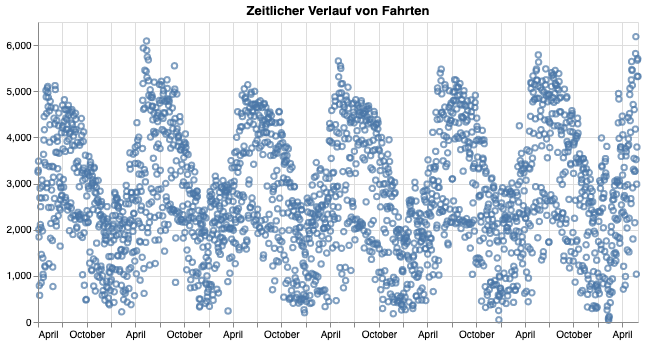

In [39]:
def Zeitlicher_Verlauf(DatenQuelle=DatenQuelle, 
                       Variable='Fahrten'):
    
    Zeitlicher_Verlauf = alt.Chart(
        DatenQuelle,
        width=600,
        height=300
    ).mark_point(
    ).encode(
        x=alt.X(
            'Datum:T',
            axis=alt.Axis(title=None)
        ),
        y=alt.Y(
            Variable,
            axis=alt.Axis(title=None)
        ),
        tooltip=list(DatenQuelle.columns)   
    ).properties(
        title='Zeitlicher Verlauf von ' + Variable
    )
    
    return Zeitlicher_Verlauf

Zeitlicher_Verlauf(DatenQuelle, 'Fahrten')

In [104]:
def Geglaetteter_Zeitlicher_Verlauf(DatenQuelle=DatenQuelle,
                                    Variable='Fahrten',
                                    Glaettungsfenster=7):

    Geglaetteter_Zeitlicher_Verlauf = alt.Chart(
        DatenQuelle,
        width=600,
        height=300
    ).mark_line(
        color='orange',
        size=3
    ).transform_window(
        Gelaettete_Variable='mean('+ Variable + ')',
        frame=[0, 7]
    ).encode(
        x=alt.X(
            'Datum:T',
            axis=alt.Axis(
                title=None
            )
        ),
        y=alt.Y(
            'Gelaettete_Variable:Q',
            axis=alt.Axis(
                title=None
            )
        )
    )
    
    Geglaetteter_Zeitlicher_Verlauf.properties(
        title='Geglaetteter zeitlicher Verlauf von ' + Variable + ' (' + str(Glaettungsfenster) + 'T)'
    )
    
    return Geglaetteter_Zeitlicher_Verlauf

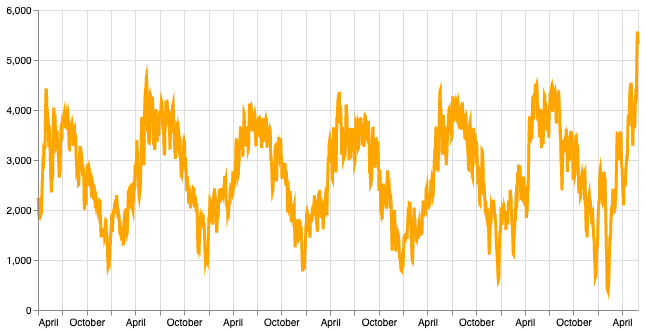

In [105]:
Geglaetteter_Zeitlicher_Verlauf()

In [ ]:
def Zeitlicher_Verlauf_mit_Glaettung(DatenQuelle=DatenQuelle,
                                     Variable='Fahrten',
                                     Glaettungsfenster=7):
    
    zV = Zeitlicher_Verlauf()
    gzV = Geglaetteter_Zeitlicher_Verlauf()
    
    zV = zV.properties(
        title='Zeitlicher Verlauf von ' + Variable + ' und Glaettung (' + str(Glaettungsfenster) + 'T)'
    )
    
    Zeitlicher_Verlauf_mit_Glaettung = zV + gzV
    
    return Zeitlicher_Verlauf_mit_Glaettung

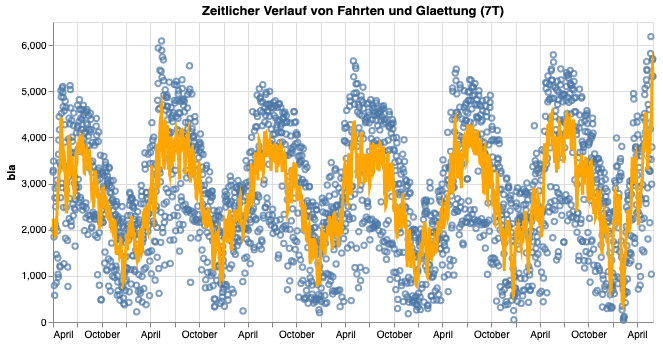

In [103]:
ZVmG = Zeitlicher_Verlauf_mit_Glaettung()
ZVmG._kwds['layer'][0].encoding.y = alt.Y('Fahrten', axis=alt.Axis(title='bla'))
vars(ZVmG._kwds['layer'][0])
ZVmG

In [118]:
def Streuung(Unabhaengige_Variable,
             Abhaengige_Variable='Fahrten',
             DatenQuelle=DatenQuelle):
    
    Streuung = alt.Chart(
        data=DatenQuelle,
        width=263,
        height=263
    ).mark_point().encode(
        x=alt.X(
            Unabhaengige_Variable,
            scale=alt.Scale(zero=False)
        ),
        y=alt.Y(
            Abhaengige_Variable,
            scale=alt.Scale(zero=False)
        ),
        tooltip=list(DatenQuelle.columns)
    )
    
    return Streuung

In [132]:
def Grafik_Verlauf(Variable='Fahrten', 
            DatenQuelle=DatenQuelle, 
            Glaettungsfenster=None):
    
    Grafik_Verlauf = alt.Chart(
        data=DatenQuelle,
        width=600,
        height=300
    )
    
    if Glaettungsfenster:
        
        Grafik_Verlauf.mark_line(
            color='orange',
            size=3
        ).transform_window(
            Gelaettete_Variable='mean('+ Variable + ')',
            frame=[0, Glaettungsfenster]
        ).encode(
            x=alt.X(
                'Datum:T',
                axis=alt.Axis(
                    title=None
                )
            ),
            y=alt.Y(
                'Gelaettete_Variable:Q',
                axis=alt.Axis(
                    title=None
                )
            )
        ).properties(
            title='Zeitlicher Verlauf von ' + Variable + ' und Glaettung (' + str(Glaettungsfenster) + 'T)'
        )
        
    else:
        
        Grafik_Verlauf.mark_point(
        ).encode(
            x=alt.X(
                'Datum:T',
                axis=alt.Axis(title=None)
            ),
            y=alt.Y(
                Variable,
                axis=alt.Axis(title=None)
            ),
            tooltip=list(DatenQuelle.columns)   
        ).properties(
            title='Zeitlicher Verlauf von ' + Variable
        )
        
    return Grafik_Verlauf

In [133]:
Grafik_Verlauf()

SchemaValidationError: Invalid specification

        altair.vegalite.v3.api.Chart, validating 'required'

        'mark' is a required property
        

Chart({
  data:       index      Datum  Fahrten  Tageslaenge  Werktag  Temperatur  \
  180     180 2013-04-01   3248.0    12.569347        1        12.8   
  181     181 2013-04-02   3287.0    12.627819        1        11.5   
  182     182 2013-04-03   3486.0    12.686201        1        11.7   
  183     183 2013-04-04   2007.0    12.744485        1        12.0   
  184     184 2013-04-05   1842.0    12.802661        1        12.2   
  185     185 2013-04-06    789.0    12.860720        0         9.8   
  186     186 2013-04-07    577.0    12.918653        0         7.2   
  187     187 2013-04-08   2689.0    12.976449        1         7.7   
  188     188 2013-04-09   2900.0    13.034098        1         9.1   
  189     189 2013-04-10   2113.0    13.091591        1        11.7   
  190     190 2013-04-11   2499.0    13.148917        1         9.2   
  191     191 2013-04-12   2045.0    13.206064        1         7.6   
  192     192 2013-04-13    846.0    13.263023        0        

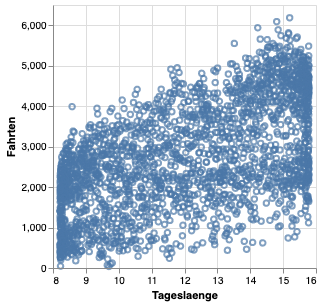

In [119]:
Streuung('Tageslaenge')

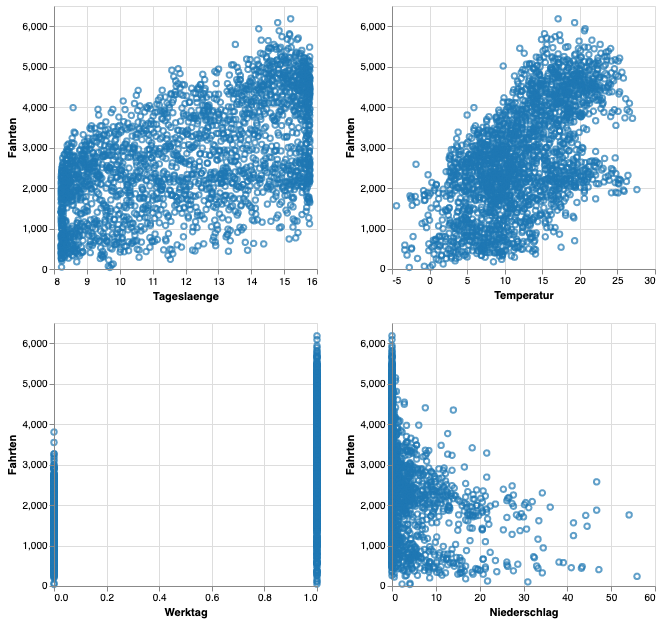

In [43]:
def Interaktive_Streuung(Auswahlfilter, 
                         Unabhaengige_Variable,
                         Abhaengige_Variable='Fahrten', 
                         DatenQuelle=DatenQuelle):
    
    
    Interaktive_Streuung = Streuung(
        Unabhaengige_Variable,
        Abhaengige_Variable=Abhaengige_Variable,
        DatenQuelle=DatenQuelle
    ).encode(
        color=alt.condition(
            Auswahlfilter,
            alt.ColorValue('#1f77b4'),
            alt.ColorValue('lightgrey')
        )
    ).add_selection(
        Auswahlfilter
    )
    
    return Interaktive_Streuung

def Streuungsuebersicht(
    Abhaengige_Variable='Fahrten', 
    DatenQuelle=DatenQuelle):
    
    Auswahlfilter = alt.selection(type='interval', resolve='global')
    
    Streuung_Tageslaenge = Interaktive_Streuung(
        Auswahlfilter,
        'Tageslaenge', 
        Abhaengige_Variable=Abhaengige_Variable, 
        DatenQuelle=DatenQuelle
    )
    
    Streuung_Werktag = Interaktive_Streuung(
        Auswahlfilter,
        'Werktag', 
        Abhaengige_Variable=Abhaengige_Variable, 
        DatenQuelle=DatenQuelle
    )
    
    Streuung_Temperatur = Interaktive_Streuung(
        Auswahlfilter,
        'Temperatur', 
        Abhaengige_Variable=Abhaengige_Variable, 
        DatenQuelle=DatenQuelle
    )
    
    Streuung_Niederschlag = Interaktive_Streuung(
        Auswahlfilter,
        'Niederschlag', 
        Abhaengige_Variable=Abhaengige_Variable, 
        DatenQuelle=DatenQuelle
    )
    
    Streuungsuebersicht = (
        Streuung_Tageslaenge & Streuung_Werktag
    ) | (
        Streuung_Temperatur & Streuung_Niederschlag
    )
    
    return Streuungsuebersicht

Streuungsuebersicht()

In [116]:
def Grafik_Streuung(Abhaengige_Variable, 
                    Unabhaengige_Variable='Fahrten',
                    DatenQuelle=DatenQuelle,
                    Auswahlfilter=None):
    
    Grafik_Streuung = alt.Chart(
        DatenQuelle,
        width=263,
        height=263
    ).mark_point().encode(
        x=alt.X(
            Unabhaengige_Variable,
            scale=alt.Scale(zero=False)
        ),
        y=alt.Y(
            Abhaengige_Variable,
            scale=alt.Scale(zero=False)
        ),
        tooltip=list(DatenQuelle.columns)
    )
    
    if Auswahlfilter:
        
        Grafik_Streuung.encode(
            color=alt.condition(
                Auswahlfilter,
                alt.ColorValue('#1f77b4'),
                alt.ColorValue('lightgrey')
            )
        ).add_selection(
            Auswahlfilter
        )
    
    return Grafik_Streuung

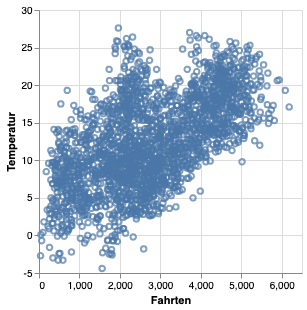

In [117]:
Grafik_Streuung('Temperatur')

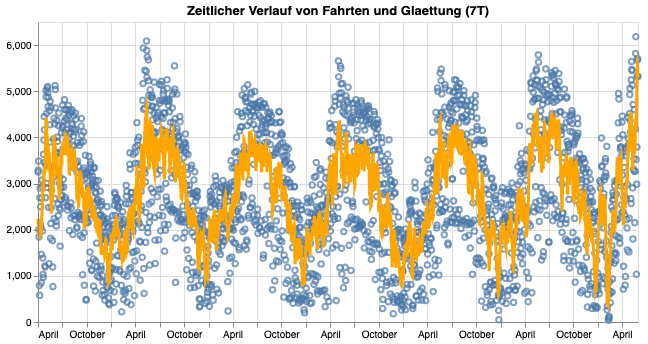

In [45]:
Gesamt = Zeitlicher_Verlauf_mit_Glaettung()# & Streuungsuebersicht()
#Gesamt = Gesamt.layer[1].encode(x=alt.X(title = 'bla'))
#alt.Chart = Gesamt.layer[0]
Gesamt.

## Modellierung der Daten *(Modelling)*

### Lineare Regression - eine kurze Einführung

### Ein einfaches lineares Modell - Abhängigkeit der Fahrten von der Tageslänge

In [ ]:
Modelldaten = Daten.copy()

X = Modelldaten[['Tageslaenge']]
y = Modelldaten['Fahrten']

LR_Modell = LinearRegression().fit(X, y)

Modelldaten['Trend'] = LR_Modell.predict(X)
Modelldaten['Fahrten_bereiningt_um_Trend'] = Modelldaten['Fahrten'] - Modelldaten['Trend'] - Modelldaten['Trend'].mean()

#Gerade_X = np.linspace(Modelldaten['Tageslaenge'].min(), Modelldaten['Tageslaenge'].max())
#Gerade_y = LR_Modell.predict(Gerade_X[:, None])

#Streudiagramme_und_Histogramme(
#    Modelldaten, 
#    Variablen_Liste=['Fahrten_bereiningt_um_Trend', 'Tageslaenge']
#)

### *Do-It-Yourself: Abhängigkeit der Fahrten von der Temperatur*

In [ ]:
Modelldaten = Daten.copy()

X = Modelldaten[['Temperatur']]
y = Modelldaten['Fahrten']

LR_Modell = LinearRegression().fit(X, y)

Modelldaten['Trend'] = LR_Modell.predict(X)
Modelldaten['Fahrten_bereiningt_um_Trend'] = Modelldaten['Fahrten'] - Modelldaten['Trend'] - Modelldaten['Trend'].mean()

#Gerade_X = np.linspace(Modelldaten['Tageslaenge'].min(), Modelldaten['Tageslaenge'].max())
#Gerade_y = LR_Modell.predict(Gerade_X[:, None])

#Streudiagramme_und_Histogramme(
#    Modelldaten, 
#    Variablen_Liste=['Fahrten_bereiningt_um_Trend', 'Temperatur']
#)

### Ein multi-lineares Modell - Abhängigkeit der Fahrten von Tageslänge und Wochentag

In [ ]:
Modelldaten = Daten.copy()

X = Modelldaten[['Tageslaenge', 'Werktag']]
y = Modelldaten['Fahrten']

LR_Modell = LinearRegression().fit(X, y)

Modelldaten['Trend'] = LR_Modell.predict(X)
Modelldaten['Fahrten_bereiningt_um_Trend'] = Modelldaten['Fahrten'] - Modelldaten['Trend'] - Modelldaten['Trend'].mean()

#Streudiagramme_und_Histogramme(
#    Modelldaten, 
#    Variablen_Liste=['Fahrten_bereiningt_um_Trend', 'Tageslaenge', 'Werktag']
#)

### *Do-It-Yourself: Abhängigkeit der Fahrten von Temperatur und Niederschlag*

In [ ]:
Modelldaten = Daten.copy()

X = Modelldaten[['Temperatur', 'Niederschlag']]
y = Modelldaten['Fahrten']

LR_Modell = LinearRegression().fit(X, y)

Modelldaten['Trend'] = LR_Modell.predict(X)
Modelldaten['Fahrten_bereiningt_um_Trend'] = Modelldaten['Fahrten'] - Modelldaten['Trend'] - Modelldaten['Trend'].mean()

#Streudiagramme_und_Histogramme(
#    Modelldaten, 
#    Variablen_Liste=['Fahrten_bereiningt_um_Trend', 'Temperatur', 'Niederschlag']
#)

### Das vollständige multi-lineare Modell

In [ ]:
Modelldaten = Daten.copy()

X = Modelldaten[['Tageslaenge', 'Werktag', 'Temperatur', 'Niederschlag', 'Tage']]
y = Modelldaten['Fahrten']

LR_Modell = LinearRegression().fit(X, y)

Modelldaten['Trend'] = LR_Modell.predict(X)
Modelldaten['Fahrten_bereiningt_um_Trend'] = Modelldaten['Fahrten'] - Modelldaten['Trend'] - Modelldaten['Trend'].mean()

#Streudiagramme_und_Histogramme(
#    Modelldaten, 
#    Variablen_Liste=['Fahrten_bereiningt_um_Trend', 'Tageslaenge', 'Werktag', 'Temperatur', 'Niederschlag', 'Tage']
#)

## Ergebnisse